# Data Visualization Using a Dataset

 Owner: SHAZRINA MARIAM KAROBI
        
        Student 
        
 #### Objectives:
 
0. Importing libraries

1. Reading the file

2. Creating Bar plot

3. Creating Scatter plots

4. Histogram  & Distribution Graph

5. Creating ECDF(Empirical cumulative distribution function) plot

6.  Boxplot

7. violinplot

8. References
 
 
  

# import required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/skoda.csv")

#To see the dataset set uncomment next line
#display(df)

In [7]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

## Description of the columns

### Target variables:

price: selling value of the car

mileage: The number of mileage it can travel using one litre (or gallon) of fuel

### Other columns:

Index: no. of data/ car

model:List of the SKODA cars

Year: when the particular product was made

Transmission: Output of the ICE to the drive wheels

Fuel Type: kind of fuel that car may use

mpg: maximum miles per gallon that a car is able to travel

Engine size: the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc)

In [8]:

model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [9]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_coun

## Bar plot

In [10]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

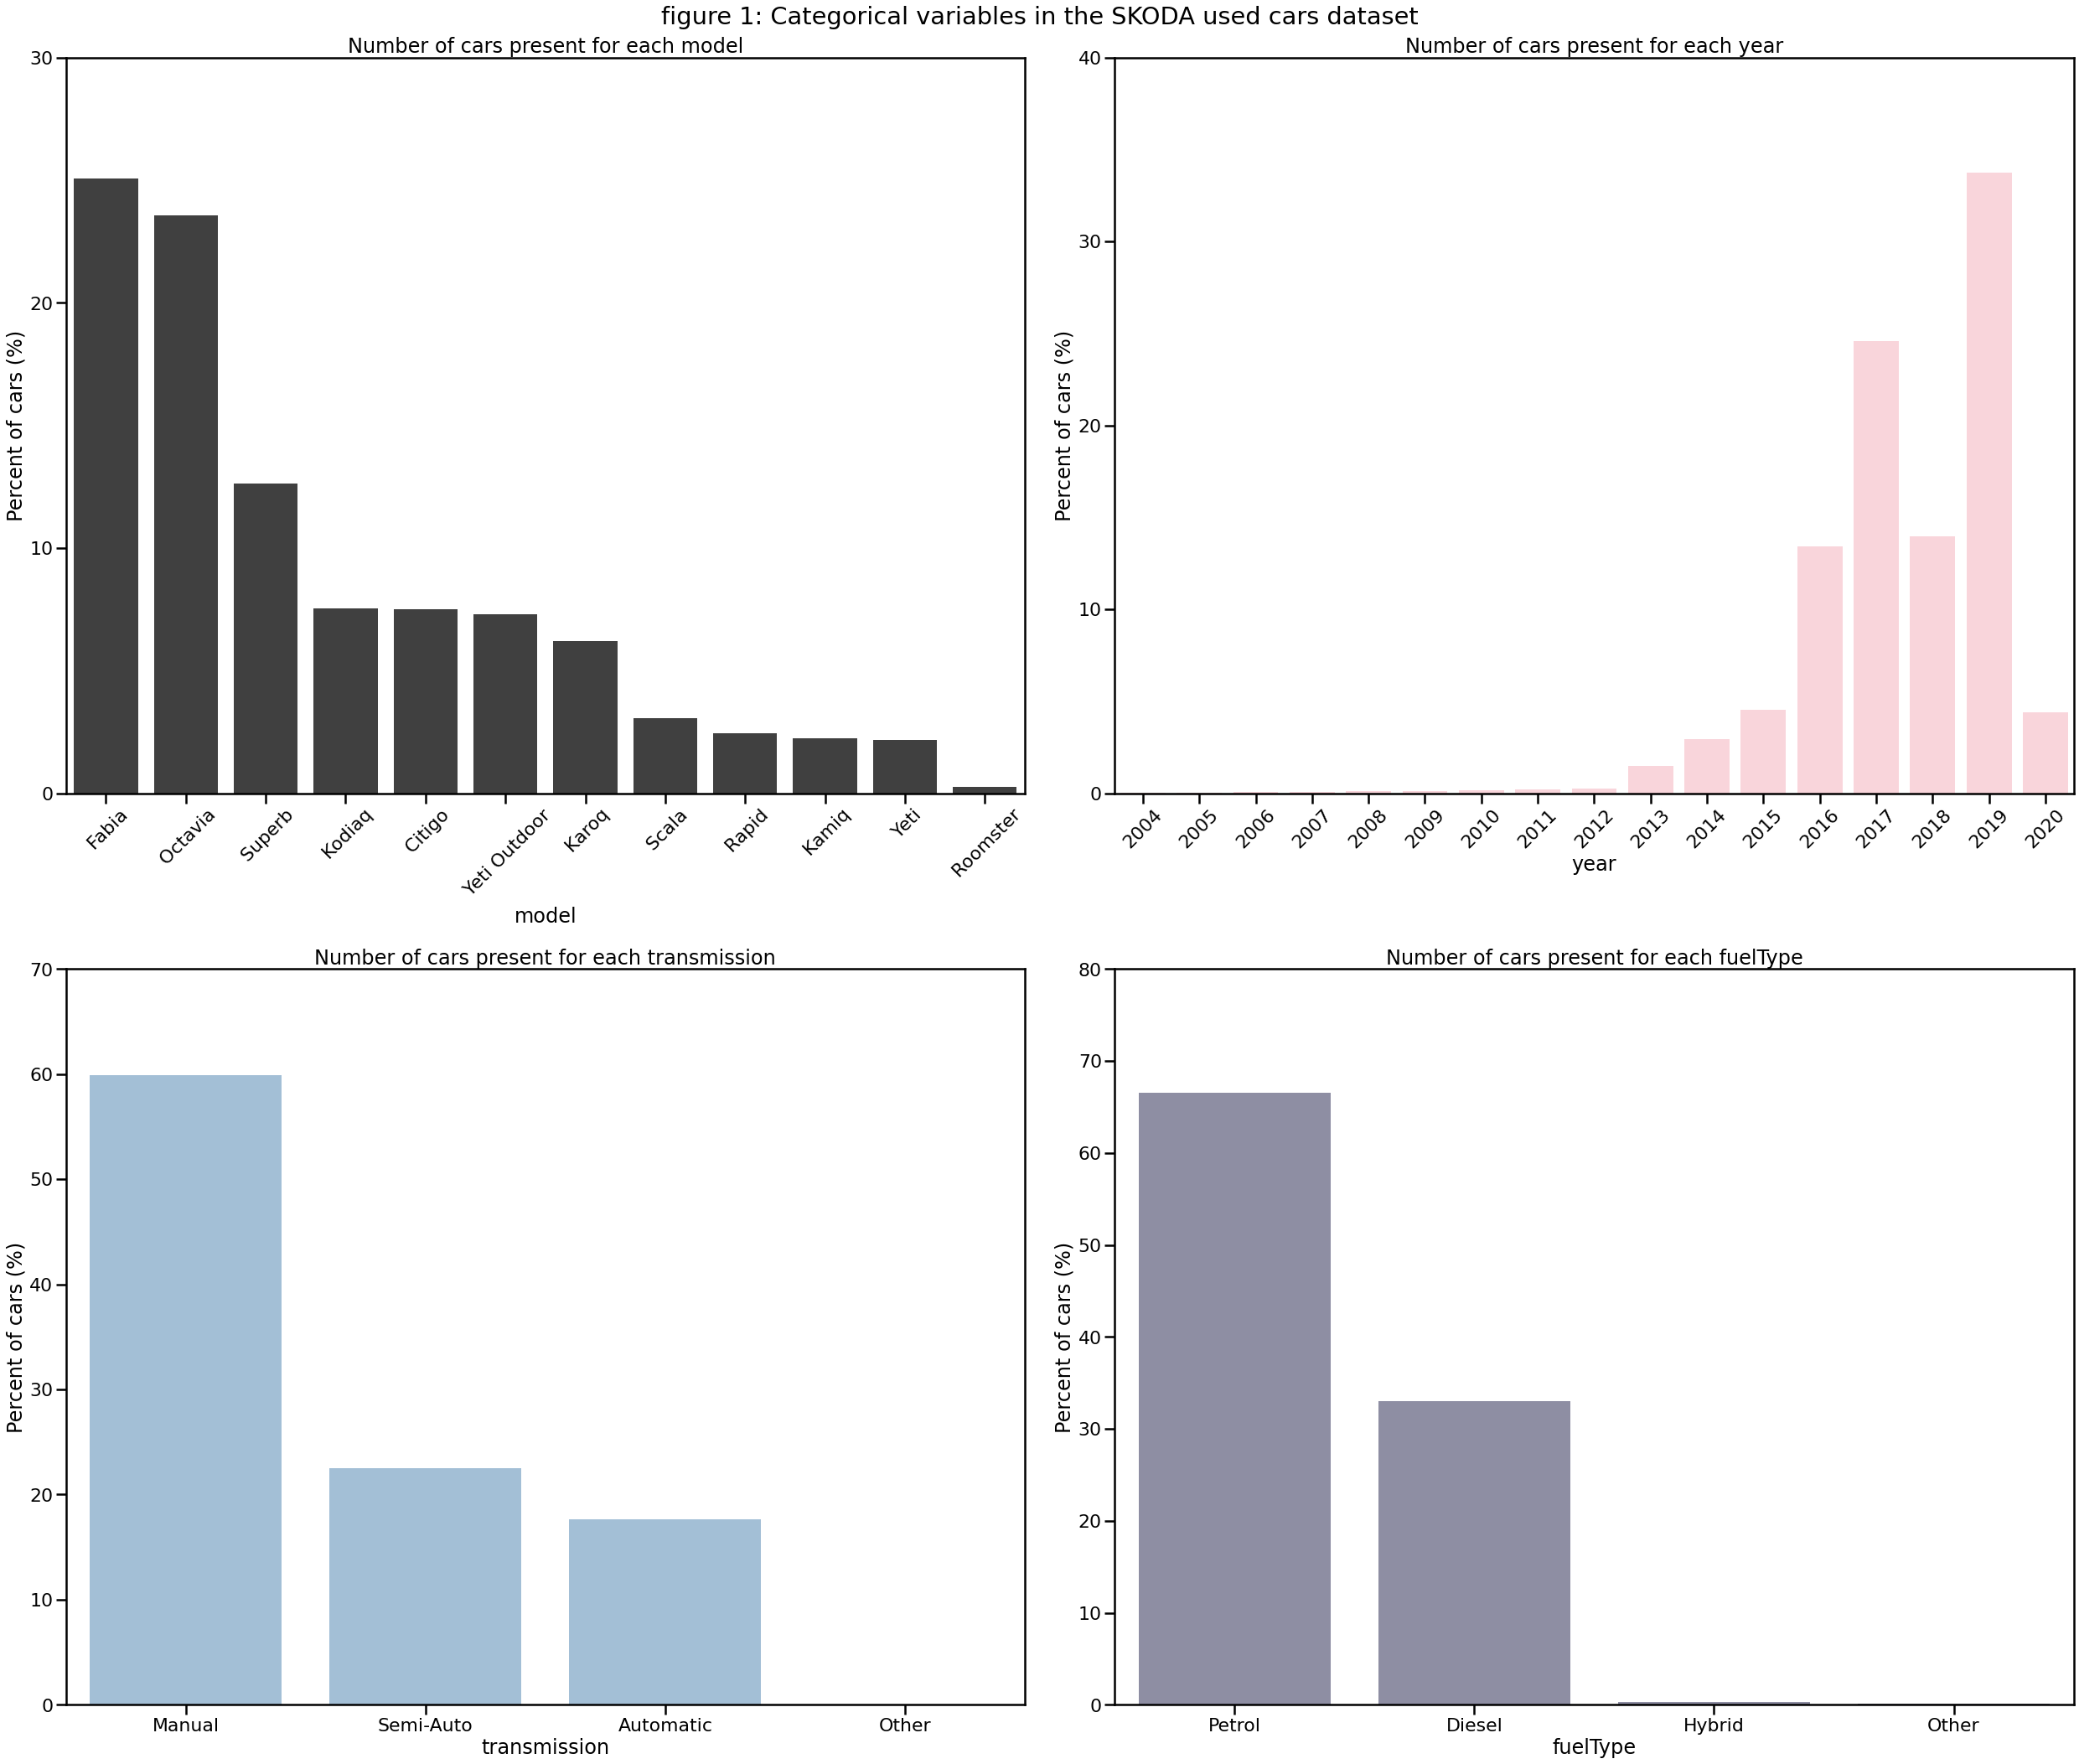

In [11]:
sns.set_context('poster')

plt.figure(figsize=(35,30))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'black', 45, np.arange(0,31,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'pink', 45, np.arange(0,41,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', '#7aabd4', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', '#646489', 0, np.arange(0,81,10))

# write the title for all the plots
plt.suptitle("figure 1: Categorical variables in the SKODA used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()
# display the plots
plt.show()

**barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.**

Here are 4 bar plotes indicating percentage of cars in y axis and varying the independent variables. respectively they are model ,year,transmission, fueltype. furthermore,  all are numerical data in both axis as we need numerical data for bar ploting!

# Scatter plots

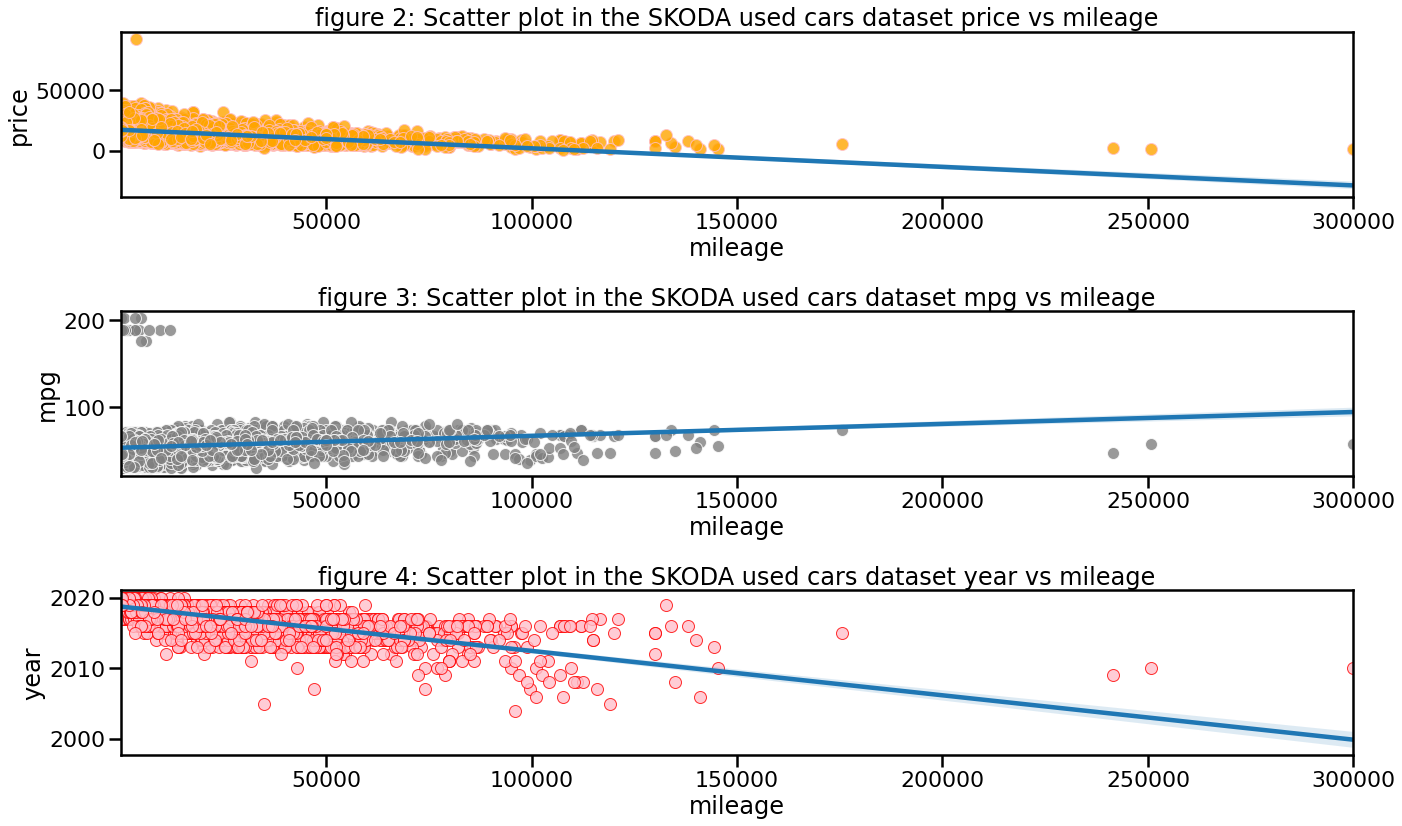

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'pink'})
plt.title("figure 2: Scatter plot in the SKODA used cars dataset price vs mileage")
# changing the color of the trend line
plt.subplot(3,1,2)
sns.regplot(x='mileage', y='mpg', data=df, scatter_kws={'color':'grey', 'edgecolor':'white'})
plt.title("figure 3: Scatter plot in the SKODA used cars dataset mpg vs mileage")
# changing the color of the scatter plot
plt.subplot(3,1,3)
sns.regplot(x='mileage', y='year', data=df, 
            scatter_kws={'color':'pink', 'edgecolor':'red'})
plt.title("figure 4: Scatter plot in the SKODA used cars dataset year vs mileage")
plt.tight_layout()
plt.show()

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. **

Here you can see 3 scatter plots for changes in different numerical values in rotation to milaeage. In this case, fig 1, which is price vs mileage would be most preferable as it's correlation is more clear than other figure. Coming next, mpg vs mileage can also be used as a good data visualization. However, last one is not that preferable for linear equation.

# Histogram  & Distribution

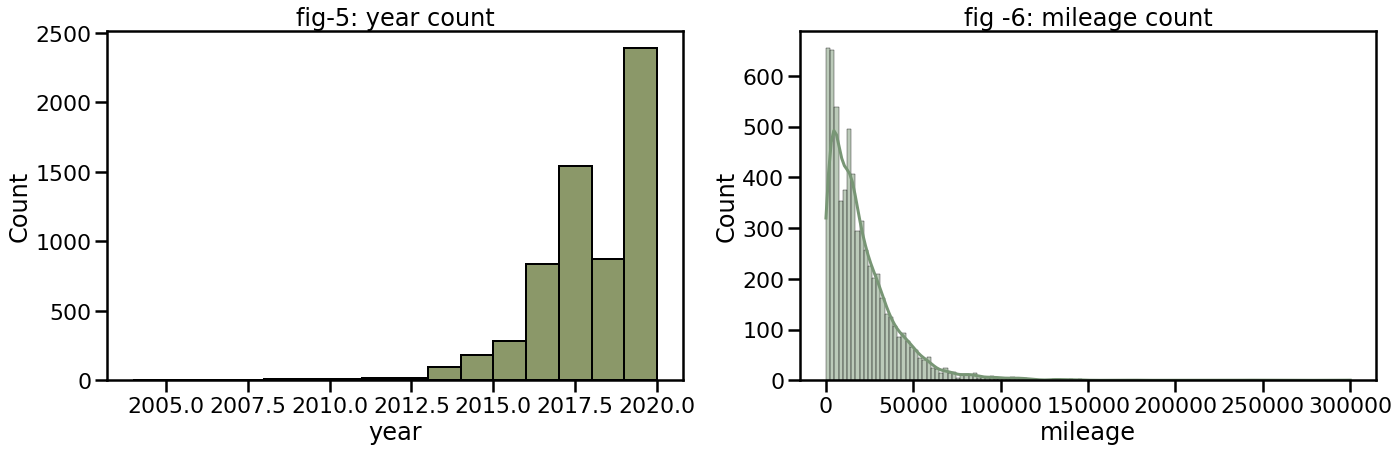

In [13]:

#histogram
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=df, x='year', color='#647637', binwidth= 1)
plt.title("fig-5: year count")

#distribution
plt.subplot(2,2,2)
sns.histplot(data=df, x='mileage', color='#789675', kde=True)
plt.title("fig -6: mileage count")



plt.tight_layout()
plt.show()

**A histogram is a graphical representation that organizes a group of data points into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.**

At fig 5 it's a histogram based on year. this df have highest count in the year of 2020, andalmost no count in 2005 and 2007. It's a **bimodal graph**.

**a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur**

The next one, figure-6 refers a ditribution of mileage. In this case we can say it's a **unimodal graph**.

# ECDF(Empirical cumulative distribution function) plot

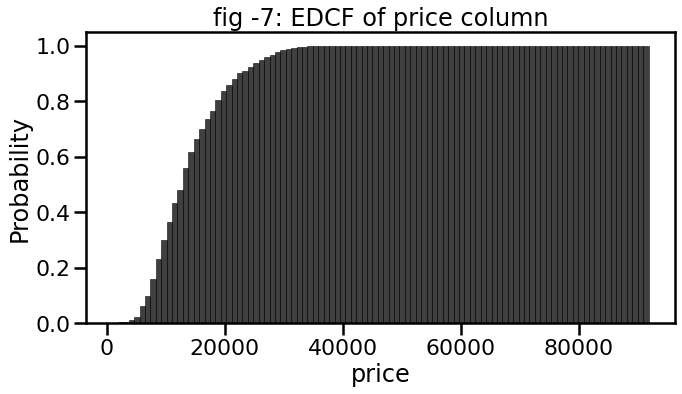

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', cumulative=True, color='black', stat='probability')
#plt.grid()
plt.title("fig -7: EDCF of price column")
plt.tight_layout()
plt.show()

**It's a cumulative distribution function which provides a way to model the cumulative probability of the sample data and helps us to estimate the cumulative distribution function. ** 

Here figure-7 is a price probability  ECDF independent variable range from 0 to 80,000. We can find out a cumilative probability for any point. For instance, the probability of price for any random value that has lower price than 40000 is 1. Moreover, it's a **negative skew.**

# Boxplot

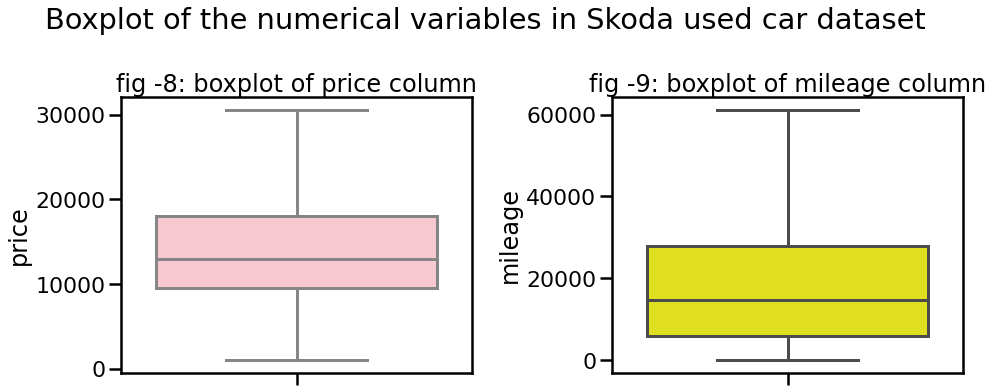

In [15]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(y=df["price"], color='pink',showfliers=False)
plt.title("fig -8: boxplot of price column")

plt.subplot(2,2,2)
sns.boxplot(y=df["mileage"], color='yellow', showfliers=False)
plt.title("fig -9: boxplot of mileage column")
plt.suptitle("Boxplot of the numerical variables in Skoda used car dataset")
plt.tight_layout()
plt.show()

##### Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of a dataset. 
Here are two boxplot of skoda dataset using price and milage column in figure 8 and 9 respectively

### Median:
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

figure-8: median value is almost 12500 and

figure-9: it's almost 14,000. 

### Inter-quartile range:
The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range. 

figure-8: from 10,000 to 18,000

figure-9: from 5,000 to 29,000

### Upper quartile:
Seventy-five percent of the scores fall below the upper quartile.

figure-8: from 18,000 to 30,000

figure-9: from 29,000 to 60,000

### Lower quartile:
Twenty-five percent of scores fall below the lower quartile.

figure-8: from 2000 to 10,000

figure-9: from 0 to 5,000

### Whiskers:
The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.


# violinplot

In [ ]:
plt.figure(figsize=(25,16))
plt.subplot(3,3,6)
sns.violinplot(y=df['price'], x=df['mileage'], hue=df['transmission'], color='grey')
plt.suptitle("Figure-10: violinplot of the numerical and catagorical variables in the Skoda dataset")
plt.tight_layout()
plt.show()

##### A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. 

Here in figure 10: x axis indicates "mileage" and y axis is Price "variable." Also, they are catagorized using the variable "Transmission".

### References:

[1] https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

[3] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html

[5] https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

[6] https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

[7] https://seaborn.pydata.org/generated/seaborn.barplot.html

[8] https://seaborn.pydata.org/generated/seaborn.set_context.html


[9] https://seaborn.pydata.org/generated/seaborn.scatterplot.html

[10] https://seaborn.pydata.org/generated/seaborn.regplot.html

[11] https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.histplot.html

[12] https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html

[13] https://seaborn.pydata.org/generated/seaborn.boxplot.html

[14] https://seaborn.pydata.org/generated/seaborn.violinplot.html


### YOU HAVE REACHED THE END


#                                          THANK YOU!